In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
blob_df = pd.read_csv("blob.csv")
dart_df = pd.read_csv("dart.csv")
outliers_df = pd.read_csv("outliers.csv")
spiral2_df = pd.read_csv("spiral2.csv")
basic2_df = pd.read_csv("basic2.csv")
boxes3_df = pd.read_csv("boxes3.csv")

In [3]:
df_blob_GMM = blob_df.copy()
df_dart_GMM = dart_df.copy()
df_basic2_GMM = basic2_df.copy()
df_outliers_GMM = outliers_df.copy()
df_spiral2_GMM = spiral2_df.copy()
df_boxes3_GMM = boxes3_df.copy()

In [4]:
df_blob_GMM.drop(['color'], axis = 1, inplace =True)
df_dart_GMM.drop(['color'], axis = 1, inplace =True)
df_basic2_GMM.drop(['color'], axis = 1, inplace =True)
df_outliers_GMM.drop(['color'], axis = 1, inplace =True)
df_spiral2_GMM.drop(['color'], axis = 1, inplace =True)
df_boxes3_GMM.drop(['color'], axis = 1, inplace =True)

In [5]:
# Training model
from sklearn.mixture import GaussianMixture

GMM_blob = GaussianMixture(n_components=4)
GMM_dart = GaussianMixture(n_components=2)
GMM_basic = GaussianMixture(n_components=5)
GMM_outliers = GaussianMixture(n_components=3)
GMM_spiral2 = GaussianMixture(n_components=2)
GMM_boxes3 = GaussianMixture(n_components=12)

y_GMM_blob = GMM_blob.fit_predict(df_blob_GMM)
y_GMM_dart = GMM_dart.fit_predict(df_dart_GMM)
y_GMM_basic = GMM_basic.fit_predict(df_basic2_GMM)
y_GMM_outliers = GMM_outliers.fit_predict(df_outliers_GMM)
y_GMM_spiral2 = GMM_spiral2.fit_predict(df_spiral2_GMM)
y_GMM_boxes3 = GMM_boxes3.fit_predict(df_boxes3_GMM)

In [6]:
# Creating 'Cluster' columns in data sets
df_blob_GMM['Cluster'] = y_GMM_blob
df_dart_GMM['Cluster'] = y_GMM_dart
df_basic2_GMM['Cluster'] = y_GMM_basic
df_outliers_GMM['Cluster'] = y_GMM_outliers
df_spiral2_GMM['Cluster'] = y_GMM_spiral2
df_boxes3_GMM['Cluster'] = y_GMM_boxes3

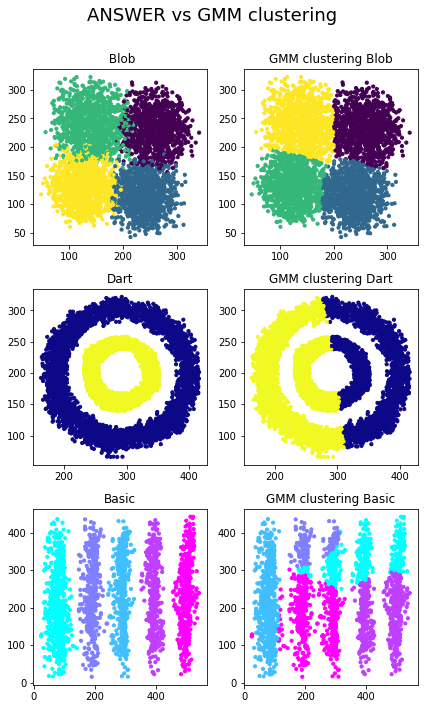

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(6,10))
fig.suptitle('ANSWER vs GMM clustering\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "viridis")
axes[0,0].set_title(" Blob");
axes[0,1].scatter(df_blob_GMM['x'], df_blob_GMM['y'], c=df_blob_GMM['Cluster'], s=10, cmap = "viridis")
axes[0,1].set_title("GMM clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "plasma")
axes[1,0].set_title("Dart");
axes[1,1].scatter(df_dart_GMM['x'], df_dart_GMM['y'], c=df_dart_GMM['Cluster'], s=10, cmap = "plasma")
axes[1,1].set_title("GMM clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "cool")
axes[2,0].set_title("Basic");
axes[2,1].scatter(df_basic2_GMM['x'], df_basic2_GMM['y'], c=df_basic2_GMM['Cluster'], s=10, cmap = "cool")
axes[2,1].set_title("GMM clustering Basic");


plt.tight_layout()

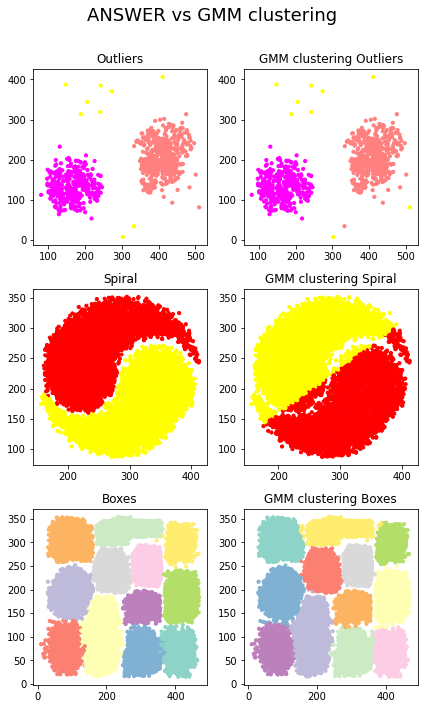

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(6,10))
fig.suptitle('ANSWER vs GMM clustering\n', size = 18)

axes[0,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "spring")
axes[0,0].set_title("Outliers");
axes[0,1].scatter(df_outliers_GMM['x'], df_outliers_GMM['y'], c=df_outliers_GMM['Cluster'], s=10, cmap = "spring")
axes[0,1].set_title("GMM clustering Outliers");

axes[1,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "autumn")
axes[1,0].set_title("Spiral");
axes[1,1].scatter(df_spiral2_GMM['x'], df_spiral2_GMM['y'], c=df_spiral2_GMM['Cluster'], s=10, cmap = "autumn")
axes[1,1].set_title("GMM clustering Spiral");

axes[2,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Boxes");
axes[2,1].scatter(df_boxes3_GMM['x'], df_boxes3_GMM['y'], c=df_boxes3_GMM['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("GMM clustering Boxes");

plt.tight_layout()

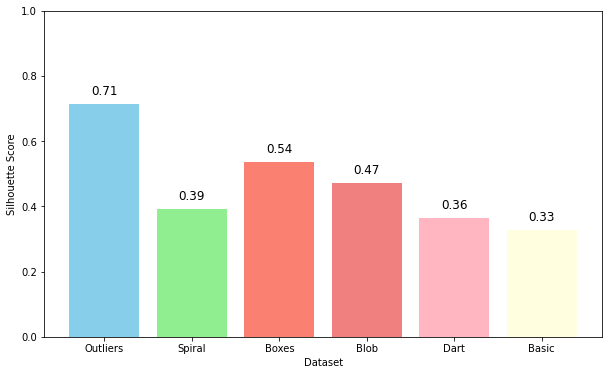

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to calculate silhouette score for GMM
def calculate_silhouette_score_gmm(df, cluster_column, features=['x', 'y']):
    labels = df[cluster_column]
    filtered_features = df[features]
    
    # Calculate silhouette score for GMM clusters
    return silhouette_score(filtered_features, labels)

# Silhouette scores for each dataset (GMM clustering)
silhouette_scores_gmm = {
    'Outliers': calculate_silhouette_score_gmm(df_outliers_GMM, 'Cluster'),
    'Spiral': calculate_silhouette_score_gmm(df_spiral2_GMM, 'Cluster'),
    'Boxes': calculate_silhouette_score_gmm(df_boxes3_GMM, 'Cluster'),
    'Blob': calculate_silhouette_score_gmm(df_blob_GMM, 'Cluster'),
    'Dart': calculate_silhouette_score_gmm(df_dart_GMM, 'Cluster'),
    'Basic': calculate_silhouette_score_gmm(df_basic2_GMM, 'Cluster')
}

# Create a bar chart for silhouette scores
datasets = list(silhouette_scores_gmm.keys())
scores = list(silhouette_scores_gmm.values())
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightpink', 'lightyellow']

plt.figure(figsize=(10, 6))
bars = plt.bar(datasets, scores, color=colors)

# Add silhouette score text on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (silhouette score)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Set the labels and title
plt.xlabel('Dataset')
plt.ylabel('Silhouette Score')
plt.ylim([0, 1])  # Set the y-axis to range from 0 to 1, as silhouette score is always in this range
#plt.title('Silhouette Scores for GMM Clustering on Different Datasets')

# Show the plot
plt.show()


In [10]:
from sklearn.metrics import adjusted_rand_score

# Extract the true labels from the 'Cluster' column
y_true_blob = blob_df['color'].values  # True labels for the Blob dataset
y_true_dart =dart_df['color'].values  # True labels for the Dart dataset
y_true_basic = basic2_df['color'].values  # True labels for the Basic dataset
y_true_outliers =outliers_df['color'].values  # True labels for the Outliers dataset
y_true_spiral2 =spiral2_df['color'].values  # True labels for the Spiral dataset
y_true_boxes3 = boxes3_df['color'].values  # True labels for the Boxes dataset

# Calculate ARI for all datasets
blob_ari = adjusted_rand_score(y_true_blob, y_GMM_blob)
dart_ari = adjusted_rand_score(y_true_dart, y_GMM_dart)
basic_ari = adjusted_rand_score(y_true_basic, y_GMM_basic)
outliers_ari = adjusted_rand_score(y_true_outliers, y_GMM_outliers)
spiral2_ari = adjusted_rand_score(y_true_spiral2, y_GMM_spiral2)
boxes3_ari = adjusted_rand_score(y_true_boxes3, y_GMM_boxes3)

# Print ARI for all datasets
print("Adjusted Rand Index Scores:")
print(f"Blob: {blob_ari}")
print(f"Dart: {dart_ari}")
print(f"Basic: {basic_ari}")
print(f"Outliers: {outliers_ari}")
print(f"Spiral: {spiral2_ari}")
print(f"Boxes: {boxes3_ari}")



Adjusted Rand Index Scores:
Blob: 0.8747465995611916
Dart: 0.004182314608420954
Basic: 0.5520558163656045
Outliers: 0.9944660586808882
Spiral: 0.8240362173950784
Boxes: 0.9914567656487687


C:\Users\ASUS\AppData\Local\Temp/ipykernel_24828/2890642548.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Adjusted Rand Index", y="Dataset", data=ari_df, palette="viridis")


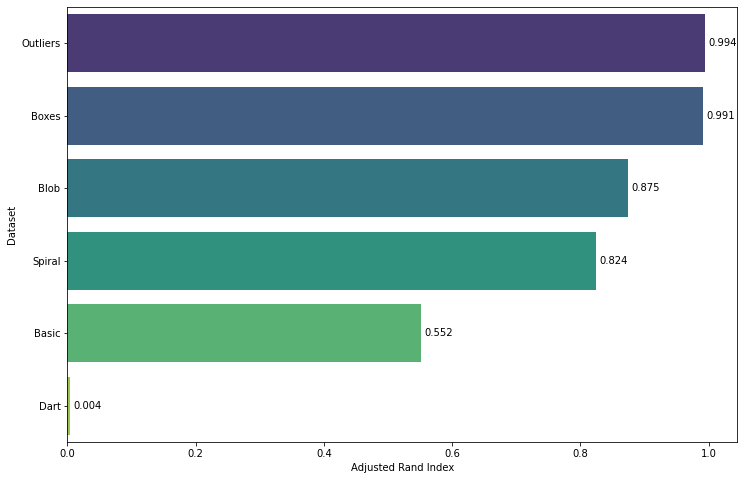

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ARI scores for all datasets
ari_scores = {
    "Blob": blob_ari,
    "Dart": dart_ari,
    "Basic": basic_ari,
    "Outliers": outliers_ari,
    "Spiral": spiral2_ari,
    "Boxes": boxes3_ari
}

# Create a DataFrame for better visualization
ari_df = pd.DataFrame(list(ari_scores.items()), columns=["Dataset", "Adjusted Rand Index"])

# Sort the ARI scores in descending order
ari_df = ari_df.sort_values(by="Adjusted Rand Index", ascending=False)

# Set up the plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Adjusted Rand Index", y="Dataset", data=ari_df, palette="viridis")

# Add title and labels
#plt.title("Adjusted Rand Index Scores for DBSCAN on Different Datasets")
plt.xlabel("Adjusted Rand Index")
plt.ylabel("Dataset")

# Annotate the bars with the ARI values
for i, v in enumerate(ari_df["Adjusted Rand Index"]):
    ax.text(v + 0.005, i, f"{v:.3f}", va="center", color="black")

# Show plot
plt.show()

